# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('Data1.csv')

In [2]:
df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [3]:
df.shape

(10, 4)

In [4]:
df.describe()

,Age,Salary
count,9.000000,9.000000
mean,38.777778,63777.777778
std,7.693793,12265.579662
min,27.000000,48000.000000
25%,35.000000,54000.000000
50%,38.000000,61000.000000
75%,44.000000,72000.000000
max,50.000000,83000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [6]:
df.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

# Handle the null values

In [7]:
df.Age=df.Age.fillna(df.Age.median())
df.Salary=df.Salary.fillna(df.Salary.mean())


In [8]:
df.isnull().sum()

Country      0
Age          0
Salary       0
Purchased    0
dtype: int64

In [9]:
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.000000,No
1,Spain,27.0,48000.000000,Yes
2,Germany,30.0,54000.000000,No
3,Spain,38.0,61000.000000,No
4,Germany,40.0,63777.777778,Yes
5,France,35.0,58000.000000,Yes
6,Spain,38.0,52000.000000,No
7,France,48.0,79000.000000,Yes
8,Germany,50.0,83000.000000,No
9,France,37.0,67000.000000,Yes


In [10]:
df.columns

Index(['Country', 'Age', 'Salary', 'Purchased'], dtype='object')


# Input & Output Data

# loc

In [11]:
df.loc[2:5]

,Country,Age,Salary,Purchased
2,Germany,30.0,54000.000000,No
3,Spain,38.0,61000.000000,No
4,Germany,40.0,63777.777778,Yes
5,France,35.0,58000.000000,Yes


In [12]:
df.loc[df.Age>40]

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No


In [13]:
df.loc[df.Salary>61000]

,Country,Age,Salary,Purchased
0,France,44.0,72000.000000,No
4,Germany,40.0,63777.777778,Yes
7,France,48.0,79000.000000,Yes
8,Germany,50.0,83000.000000,No
9,France,37.0,67000.000000,Yes


# iloc

In [14]:
df.iloc[:,:]

,Country,Age,Salary,Purchased
0,France,44.0,72000.000000,No
1,Spain,27.0,48000.000000,Yes
2,Germany,30.0,54000.000000,No
3,Spain,38.0,61000.000000,No
4,Germany,40.0,63777.777778,Yes
5,France,35.0,58000.000000,Yes
6,Spain,38.0,52000.000000,No
7,France,48.0,79000.000000,Yes
8,Germany,50.0,83000.000000,No
9,France,37.0,67000.000000,Yes


In [15]:
df.iloc[:,0:3]

,Country,Age,Salary
0,France,44.0,72000.000000
1,Spain,27.0,48000.000000
2,Germany,30.0,54000.000000
3,Spain,38.0,61000.000000
4,Germany,40.0,63777.777778
5,France,35.0,58000.000000
6,Spain,38.0,52000.000000
7,France,48.0,79000.000000
8,Germany,50.0,83000.000000
9,France,37.0,67000.000000


In [16]:
df.iloc[:,-1:]

,Purchased
0,No
1,Yes
2,No
3,No
4,Yes
5,Yes
6,No
7,Yes
8,No
9,Yes


In [17]:
df.Country.value_counts()

France     4
Spain      3
Germany    3
Name: Country, dtype: int64

In [18]:
df.Purchased.value_counts()

No     5
Yes    5
Name: Purchased, dtype: int64

In [19]:
from collections import Counter as count
count(df.Purchased)

Counter({'No': 5, 'Yes': 5})

In [20]:
df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.000000,No
1,Spain,27.0,48000.000000,Yes
2,Germany,30.0,54000.000000,No
3,Spain,38.0,61000.000000,No
4,Germany,40.0,63777.777778,Yes


# Label Encoding

# Method 1

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
print('Before Label Encoding: ',count(df['Country']))
df['Country']=le.fit_transform(df['Country'])
print('After Label Encoding: ',count(df['Country']))

Before Label Encoding:  Counter({'France': 4, 'Spain': 3, 'Germany': 3})
After Label Encoding:  Counter({0: 4, 2: 3, 1: 3})


In [23]:
df

,Country,Age,Salary,Purchased
0,0,44.0,72000.000000,No
1,2,27.0,48000.000000,Yes
2,1,30.0,54000.000000,No
3,2,38.0,61000.000000,No
4,1,40.0,63777.777778,Yes
5,0,35.0,58000.000000,Yes
6,2,38.0,52000.000000,No
7,0,48.0,79000.000000,Yes
8,1,50.0,83000.000000,No
9,0,37.0,67000.000000,Yes


# Method 2

In [24]:
print('Before Label Encoding: ',count(df['Purchased']))
df['Purchased']=df['Purchased'].replace(['No','Yes'],[0,1])
print('After Label Encoding: ',count(df['Purchased']))

Before Label Encoding:  Counter({'No': 5, 'Yes': 5})
After Label Encoding:  Counter({0: 5, 1: 5})


In [25]:
df

,Country,Age,Salary,Purchased
0,0,44.0,72000.000000,0
1,2,27.0,48000.000000,1
2,1,30.0,54000.000000,0
3,2,38.0,61000.000000,0
4,1,40.0,63777.777778,1
5,0,35.0,58000.000000,1
6,2,38.0,52000.000000,0
7,0,48.0,79000.000000,1
8,1,50.0,83000.000000,0
9,0,37.0,67000.000000,1


In [26]:
df.shape

(10, 4)

# One Hot Encoding

In [32]:
from sklearn.compose import ColumnTransformer #It is used for performering both OHE & LE in single step
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer([('on',OneHotEncoder(),[0])],remainder='passthrough')
df=ct.fit_transform(df)

In [33]:
df.shape

(10, 6)

In [34]:
df

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.40000000e+01,
        7.20000000e+04, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 2.70000000e+01,
        4.80000000e+04, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 3.00000000e+01,
        5.40000000e+04, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 3.80000000e+01,
        6.10000000e+04, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 4.00000000e+01,
        6.37777778e+04, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.50000000e+01,
        5.80000000e+04, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 3.80000000e+01,
        5.20000000e+04, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.80000000e+01,
        7.90000000e+04, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 5.00000000e+01,
        8.30000000e+04, 

# Feature Scaling

In [35]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df=sc.fit_transform(df)

In [36]:
df

array([[ 1.22474487e+00, -6.54653671e-01, -6.54653671e-01,
         7.69734393e-01,  7.49473254e-01, -1.00000000e+00],
       [-8.16496581e-01, -6.54653671e-01,  1.52752523e+00,
        -1.69922498e+00, -1.43817841e+00,  1.00000000e+00],
       [-8.16496581e-01,  1.52752523e+00, -6.54653671e-01,
        -1.26352627e+00, -8.91265492e-01, -1.00000000e+00],
       [-8.16496581e-01, -6.54653671e-01,  1.52752523e+00,
        -1.01663033e-01, -2.53200424e-01, -1.00000000e+00],
       [-8.16496581e-01,  1.52752523e+00, -6.54653671e-01,
         1.88802776e-01,  6.63219199e-16,  1.00000000e+00],
       [ 1.22474487e+00, -6.54653671e-01, -6.54653671e-01,
        -5.37361746e-01, -5.26656882e-01,  1.00000000e+00],
       [-8.16496581e-01, -6.54653671e-01,  1.52752523e+00,
        -1.01663033e-01, -1.07356980e+00, -1.00000000e+00],
       [ 1.22474487e+00, -6.54653671e-01, -6.54653671e-01,
         1.35066601e+00,  1.38753832e+00,  1.00000000e+00],
       [-8.16496581e-01,  1.52752523e+00, -6.546

# Train, Test & Split

In [41]:
#independent features
x=pd.DataFrame(df[:,0:5],columns=['France', 'Spain','Germany','Age','Salary'])
x

,France,Spain,Germany,Age,Salary
0,1.224745,-0.654654,-0.654654,0.769734,7.494733e-01
1,-0.816497,-0.654654,1.527525,-1.699225,-1.438178e+00
2,-0.816497,1.527525,-0.654654,-1.263526,-8.912655e-01
3,-0.816497,-0.654654,1.527525,-0.101663,-2.532004e-01
4,-0.816497,1.527525,-0.654654,0.188803,6.632192e-16
5,1.224745,-0.654654,-0.654654,-0.537362,-5.266569e-01
6,-0.816497,-0.654654,1.527525,-0.101663,-1.073570e+00
7,1.224745,-0.654654,-0.654654,1.350666,1.387538e+00
8,-0.816497,1.527525,-0.654654,1.641132,1.752147e+00
9,1.224745,-0.654654,-0.654654,-0.246896,2.937125e-01


In [42]:
#dependent features
y=pd.DataFrame(df[:,5:],columns=['Purchased'])
y

,Purchased
0,-1.0
1,1.0
2,-1.0
3,-1.0
4,1.0
5,1.0
6,-1.0
7,1.0
8,-1.0
9,1.0


In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [45]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8, 5)
(2, 5)
(8, 1)
(2, 1)


# Simple Linear Regression

In [46]:
np.array([1,2])

array([1, 2])

In [47]:
df=pd.read_csv('Salary_Data.csv')

In [48]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [49]:
df.shape

(30, 2)

In [50]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


# Finding the null

In [52]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [53]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

Text(0, 0.5, 'Salary')

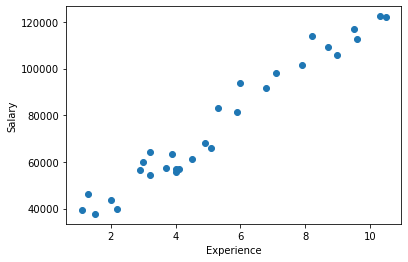

In [55]:
from matplotlib import pyplot as plt
plt.scatter(df.YearsExperience,df.Salary)
plt.xlabel('Experience')
plt.ylabel('Salary')

# Independent & Dependent 

In [59]:
x=df.iloc[:,0:1]
x

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [66]:
y=df.iloc[:,1:]
y

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0
5,56642.0
6,60150.0
7,54445.0
8,64445.0
9,57189.0


In [67]:
type(y)

pandas.core.frame.DataFrame

In [68]:
type(x)

pandas.core.frame.DataFrame

# Train,Test & Split

In [102]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [103]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(24, 1)
(6, 1)
(24, 1)
(6, 1)


# Model Building

In [104]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [105]:
y_test

,Salary
2,37731.0
28,122391.0
13,57081.0
10,63218.0
26,116969.0
24,109431.0


In [106]:
x_test

,YearsExperience
2,1.5
28,10.3
13,4.1
10,3.9
26,9.5
24,8.7


In [107]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [108]:
lr.predict(x_test)

array([[ 40748.96184072],
       [122699.62295594],
       [ 64961.65717022],
       [ 63099.14214487],
       [115249.56285456],
       [107799.50275317]])

In [109]:
x_test

,YearsExperience
2,1.5
28,10.3
13,4.1
10,3.9
26,9.5
24,8.7


In [110]:
from sklearn.metrics import r2_score
r2_score(y_test,lr.predict(x_test))

0.988169515729126

In [115]:
lr.predict([[0]])

array([[26780.09915063]])

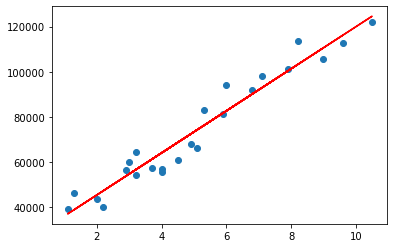

In [116]:
plt.scatter(x_train,y_train)
plt.plot(x_train,lr.predict(x_train),color='r')

In [117]:
lr.predict([[10]])

array([[119905.85041792]])

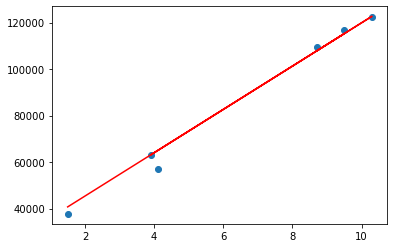

In [118]:
plt.scatter(x_test,y_test)
plt.plot(x_test,lr.predict(x_test),color='r')